# Simple RNN (Many-to-one 문제)
### - 사이파형 시계열을 입력으로 다음 스텝의 출력을 예측
### - 3개의 순서열을 입려간 수 출력값이 target과 일치하게 만듬

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = np.sin(2*np.pi/8. * np.arange(20))
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01])

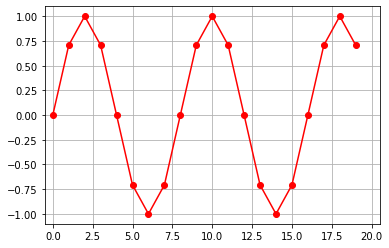

In [3]:
plt.plot(s, 'ro-')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.grid()
plt.show()

### 원래의 시계열 백터를 Toeplitz 행렬 형태로 변환

In [4]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0]-2)], s[::-1]))
S[:5,:3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [5]:
### S.shape

In [6]:
X_train = S[:-1, :3][:, :, np.newaxis]
y_train = S[:-1, 3]
X_train.shape, y_train.shape

((18, 3, 1), (18,))

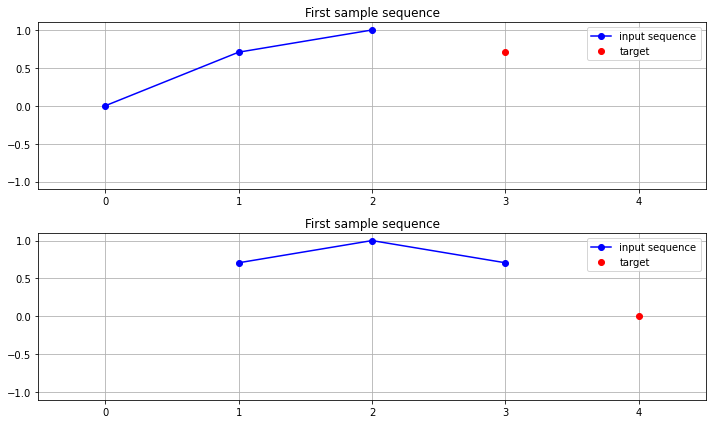

In [7]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0,1,2], X_train[0].flatten(), 'bo-', label='input sequence')
plt.plot([3], y_train[0], 'ro', label='target')
plt.xlim(-0.5, 4.5); plt.ylim(-1.1, 1.1); plt.legend()
plt.grid(); plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1,2,3], X_train[1].flatten(), 'bo-', label='input sequence')
plt.plot([4], y_train[1], 'ro', label='target')
plt.xlim(-0.5, 4.5); plt.ylim(-1.1, 1.1); plt.legend()
plt.grid(); plt.title("First sample sequence")

plt.tight_layout(); plt.show()

### 순환신경망 모델 정의/설정

In [8]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [10]:
# Numpy version 확인 (1.20.2에서는 안돌아가 1.19.5로 downgrade해야 함)
model = Sequential([ 
    SimpleRNN(10, input_shape=X_train.shape[1:], activation='tanh'),
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='mse')

### 모델 학습전

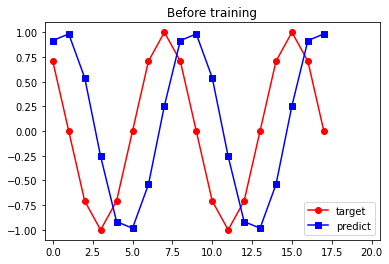

In [13]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='predict')
plt.xlim(-0.5,20.5); plt.ylim(-1.1,1.1)
plt.legend(); plt.title("Before training")
plt.show()

### 모델 학습

In [15]:
history = model.fit(X_train, y_train, epochs=100, verbose=0)

### 학습결과 확인

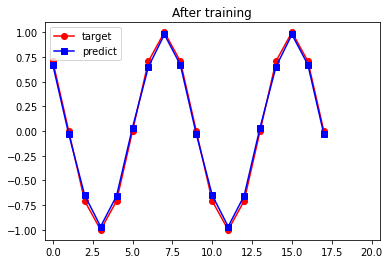

In [17]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='predict')
plt.xlim(-0.5,20.5); plt.ylim(-1.1,1.1)
plt.legend(); plt.title("After training")
plt.show()

[]

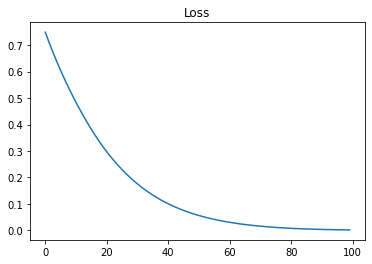

In [18]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.plot()